<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Scatter Plot**


Estimated time needed: **45** minutes


## Overview

In this lab, you will focus on creating and interpreting scatter plots to visualize relationships between variables and trends in the dataset. The provided dataset will be directly loaded into a pandas DataFrame, and various scatter plot-related visualizations will be created to explore developer trends, compensation, and preferences.



## Objectives


In this lab, you will:

- Create and analyze scatter plots to examine relationships between variables.

- Use scatter plots to identify trends and patterns in the dataset.

- Focus on visualizations centered on scatter plots for better data-driven insights.


## Setup: Working with the Database



**Install and import the required libraries**


In [1]:
!pip install pandas
!pip install matplotlib

import pandas as pd
import matplotlib.pyplot as plt

#### Step 1: Load the dataset


In [2]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

df = pd.read_csv(file_path)



### Task 1: Exploring Relationships with Scatter Plots



#### 1. Scatter Plot for Age vs. Job Satisfaction



Visualize the relationship between respondents' age (`Age`) and job satisfaction (`JobSatPoints_6`). Use this plot to identify any patterns or trends.




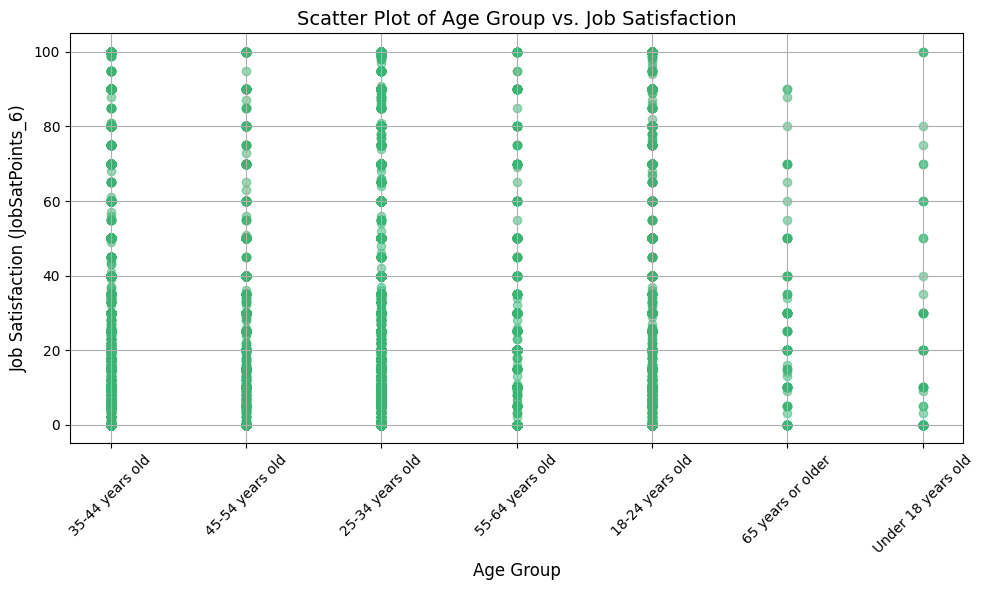

In [3]:
## Write your code here

# Replace 'Prefer not to say' with NaN and drop rows with NaN
df['Age'] = df['Age'].replace('Prefer not to say', None)
df.dropna(subset=['Age', 'JobSatPoints_6'], inplace=True)


# Define the ordered age groups
age_order = [
    "Under 18 years old",
    "18-24 years old",
    "25-34 years old",
    "35-44 years old",
    "45-54 years old",
    "55-64 years old",
    "65 years or older"
]

# Ensure the Age column is treated as a categorical variable with order
df['AgeCategory'] = pd.Categorical(df['Age'], categories=age_order, ordered=True)

# Convert JobSatPoints_6 to numeric (in case it's stored as text)
df['JobSatPoints_6'] = pd.to_numeric(df['JobSatPoints_6'], errors='coerce')

# Drop rows with missing values
df_clean = df.dropna(subset=['AgeCategory', 'JobSatPoints_6'])

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_clean['AgeCategory'], df_clean['JobSatPoints_6'], alpha=0.5, color='mediumseagreen')

# Titles and labels
plt.title("Scatter Plot of Age Group vs. Job Satisfaction", fontsize=14)
plt.xlabel("Age Group", fontsize=12)
plt.ylabel("Job Satisfaction (JobSatPoints_6)", fontsize=12)

# Rotate x-axis labels for readability
plt.xticks(rotation=45)

# Add grid and show
plt.grid(True)
plt.tight_layout()
plt.show()

#### 2. Scatter Plot for Compensation vs. Job Satisfaction


Explore the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`) using a scatter plot.


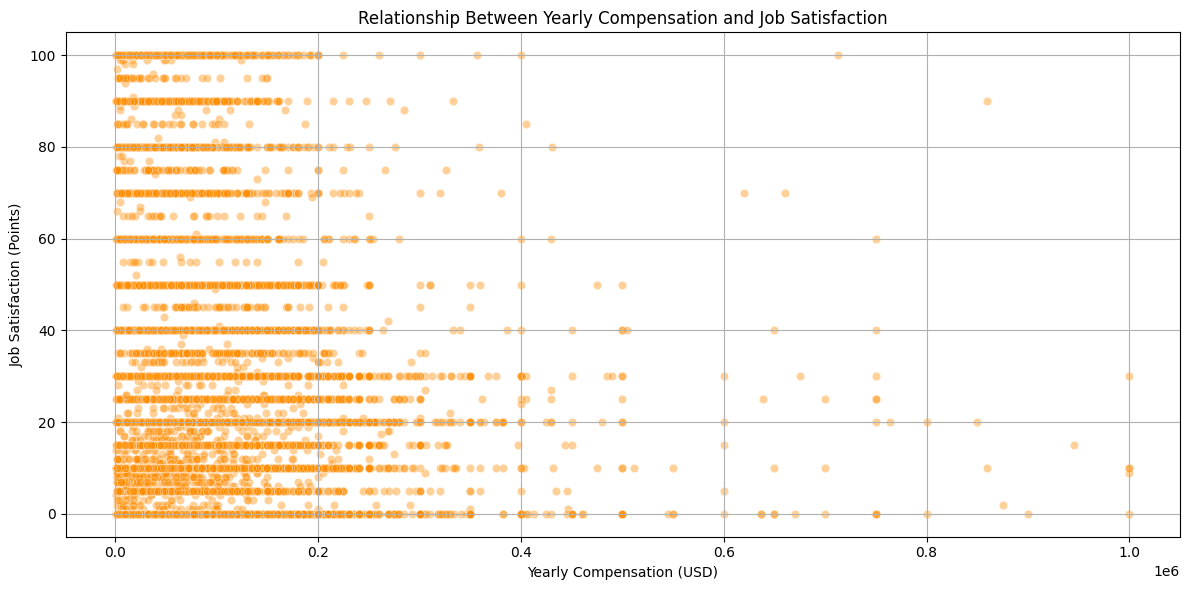

In [4]:
## Write your code here

!pip install seaborn
import seaborn as sns

# Clean the relevant columns
df['ConvertedCompYearly'] = pd.to_numeric(df['ConvertedCompYearly'], errors='coerce')
df['JobSatPoints_6'] = pd.to_numeric(df['JobSatPoints_6'], errors='coerce')

# Drop rows with missing compensation or job satisfaction
df_clean = df.dropna(subset=['ConvertedCompYearly', 'JobSatPoints_6'])

# Filter for realistic compensation values (optional)
df_clean = df_clean[
    (df_clean['ConvertedCompYearly'] >= 1000) & 
    (df_clean['ConvertedCompYearly'] <= 1000000)
]

# Create scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(
    x='ConvertedCompYearly',
    y='JobSatPoints_6',
    data=df_clean,
    alpha=0.4,
    color='darkorange'
)

# Add labels and title
plt.title('Relationship Between Yearly Compensation and Job Satisfaction')
plt.xlabel('Yearly Compensation (USD)')
plt.ylabel('Job Satisfaction (Points)')
plt.grid(True)
plt.tight_layout()
plt.show()

### Task 2: Enhancing Scatter Plots


#### 1. Scatter Plot with Trend Line for Age vs. Job Satisfaction



Add a regression line to the scatter plot of Age vs. JobSatPoints_6 to highlight trends in the data.


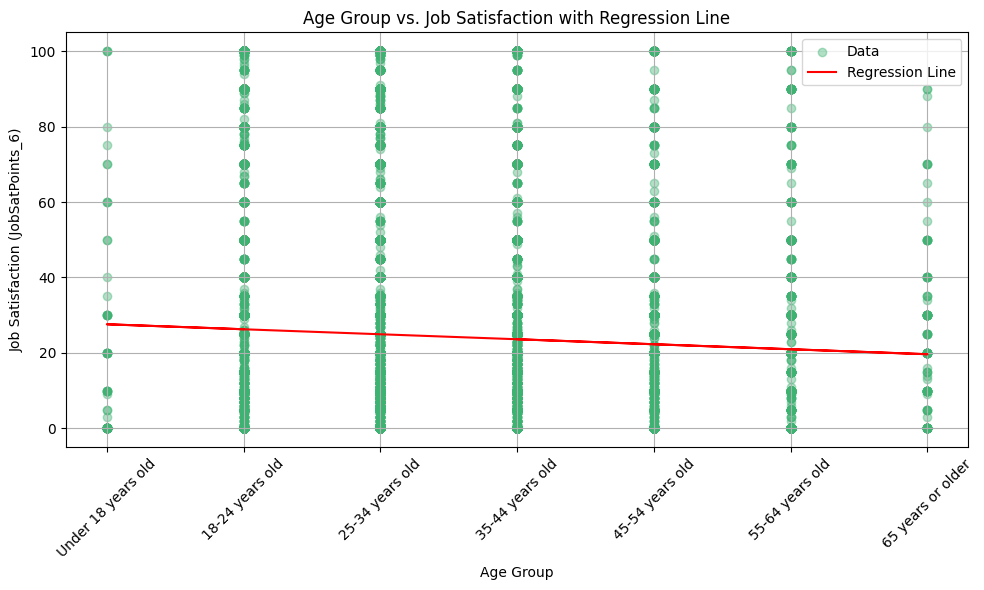

In [5]:
## Write your code here

!pip install numpy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Replace 'Prefer not to say' with NaN and drop rows with NaN
df['Age'] = df['Age'].replace('Prefer not to say', None)
df.dropna(subset=['Age', 'JobSatPoints_6'], inplace=True)

# Define the ordered age groups
age_order = [
    "Under 18 years old",
    "18-24 years old",
    "25-34 years old",
    "35-44 years old",
    "45-54 years old",
    "55-64 years old",
    "65 years or older"
]

# Map age categories to numeric values for regression
age_mapping = {age: i for i, age in enumerate(age_order, start=1)}  # e.g., 1 for 'Under 18', 2 for '18–24', etc.
df['AgeNumeric'] = df['Age'].map(age_mapping)

# Convert JobSatPoints_6 to numeric
df['JobSatPoints_6'] = pd.to_numeric(df['JobSatPoints_6'], errors='coerce')

# Drop rows with missing values
df_clean = df.dropna(subset=['AgeNumeric', 'JobSatPoints_6'])

# Calculate regression line
slope, intercept = np.polyfit(df_clean['AgeNumeric'], df_clean['JobSatPoints_6'], 1)
regression_line = slope * df_clean['AgeNumeric'] + intercept

# Plot scatter with regression line
plt.figure(figsize=(10, 6))
plt.scatter(df_clean['AgeNumeric'], df_clean['JobSatPoints_6'], alpha=0.4, label='Data', color='mediumseagreen')
plt.plot(df_clean['AgeNumeric'], regression_line, color='red', label='Regression Line')

# Custom x-tick labels
plt.xticks(
    ticks=list(age_mapping.values()),
    labels=list(age_mapping.keys()),
    rotation=45
)

# Titles and labels
plt.title("Age Group vs. Job Satisfaction with Regression Line")
plt.xlabel("Age Group")
plt.ylabel("Job Satisfaction (JobSatPoints_6)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

#### 2. Scatter Plot for Age vs. Work Experience


Visualize the relationship between Age (`Age`) and Work Experience (`YearsCodePro`) using a scatter plot.


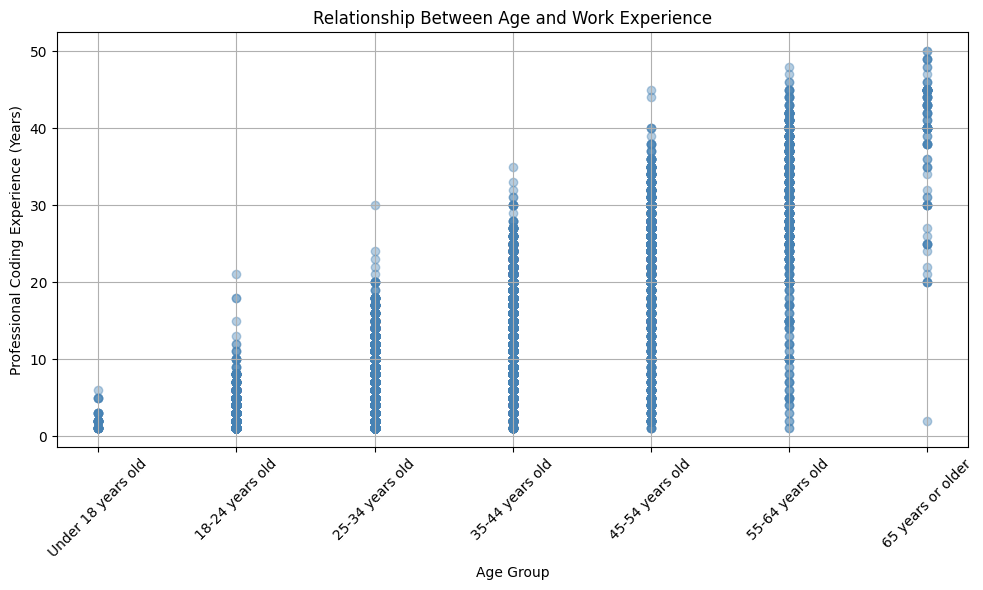

In [6]:
## Write your code here

# Define the ordered age groups
age_order = [
    "Under 18 years old",
    "18-24 years old",
    "25-34 years old",
    "35-44 years old",
    "45-54 years old",
    "55-64 years old",
    "65 years or older"
]

# Replace 'Prefer not to say' with NaN and drop missing
df['Age'] = df['Age'].replace('Prefer not to say', None)
df.dropna(subset=['Age', 'YearsCodePro'], inplace=True)

# Map age groups to numbers (1 to 7)
age_map = {age: i for i, age in enumerate(age_order, start=1)}
df['AgeNumeric'] = df['Age'].map(age_map)

# Convert YearsCodePro to numeric
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

# Drop rows with missing values
df_clean = df.dropna(subset=['AgeNumeric', 'YearsCodePro'])

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(df_clean['AgeNumeric'], df_clean['YearsCodePro'], alpha=0.4, color='steelblue')

# Set custom x-ticks with labels
plt.xticks(ticks=list(age_map.values()), labels=list(age_map.keys()), rotation=45)

plt.title('Relationship Between Age and Work Experience')
plt.xlabel('Age Group')
plt.ylabel('Professional Coding Experience (Years)')
plt.grid(True)
plt.tight_layout()
plt.show()

### Task 3: Combining Scatter Plots with Additional Features


#### 1. Bubble Plot of Compensation vs. Job Satisfaction with Age as Bubble Size



Create a bubble plot to explore the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`), with bubble size representing age.


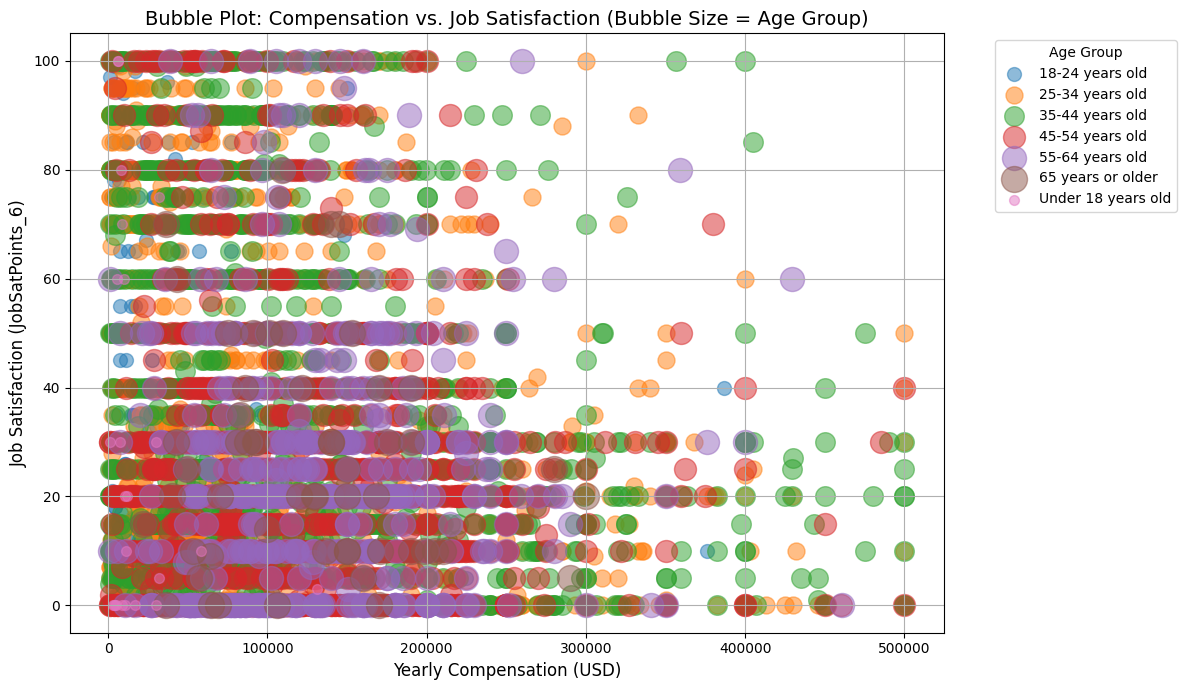

In [7]:
## Write your code here

# Step 1: Define bubble sizes per age range
bubble_size_map = {
    "Under 18 years old": 50,
    "18-24 years old": 100,
    "25-34 years old": 150,
    "35-44 years old": 200,
    "45-54 years old": 250,
    "55-64 years old": 300,
    "65 years or older": 350
}

# Step 2: Clean and map data
df['Age'] = df['Age'].replace('Prefer not to say', None)
df['ConvertedCompYearly'] = pd.to_numeric(df['ConvertedCompYearly'], errors='coerce')
df['JobSatPoints_6'] = pd.to_numeric(df['JobSatPoints_6'], errors='coerce')
df['BubbleSize'] = df['Age'].map(bubble_size_map)

# Step 3: Drop missing values
df_clean = df.dropna(subset=['ConvertedCompYearly', 'JobSatPoints_6', 'Age', 'BubbleSize'])

# Optional: filter unrealistic compensation
df_clean = df_clean[
    (df_clean['ConvertedCompYearly'] >= 1000) &
    (df_clean['ConvertedCompYearly'] <= 500000)
]

# Step 4: Plot using one scatter per age group
plt.figure(figsize=(12, 7))

for age_group, group_data in df_clean.groupby('Age'):
    plt.scatter(
        group_data['ConvertedCompYearly'],
        group_data['JobSatPoints_6'],
        s=bubble_size_map[age_group],
        alpha=0.5,
        label=age_group
    )

# Labels and legend
plt.title('Bubble Plot: Compensation vs. Job Satisfaction (Bubble Size = Age Group)', fontsize=14)
plt.xlabel('Yearly Compensation (USD)', fontsize=12)
plt.ylabel('Job Satisfaction (JobSatPoints_6)', fontsize=12)
plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

#### 2. Scatter Plot for Popular Programming Languages by Job Satisfaction


Visualize the popularity of programming languages (`LanguageHaveWorkedWith`) against job satisfaction using a scatter plot. Use points to represent satisfaction levels for each language.


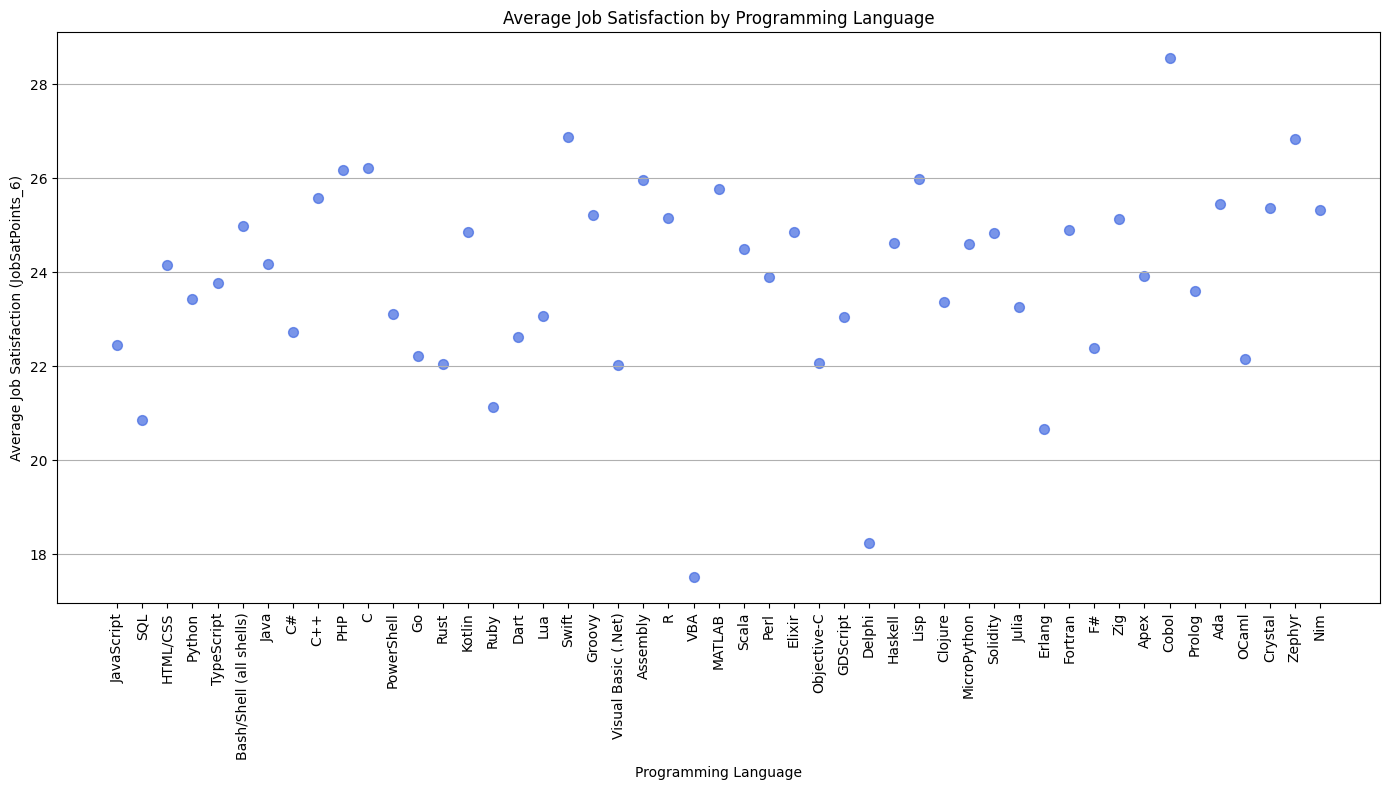

In [8]:
## Write your code here

!pip install seaborn
import seaborn as sns

# Ensure JobSatPoints_6 is numeric
df['JobSatPoints_6'] = pd.to_numeric(df['JobSatPoints_6'], errors='coerce')

# Drop missing values in key columns
df_filtered = df.dropna(subset=['LanguageHaveWorkedWith', 'JobSatPoints_6'])

# Explode the languages column
df_filtered = df_filtered.assign(Language=df_filtered['LanguageHaveWorkedWith'].str.split(';')).explode('Language')
df_filtered['Language'] = df_filtered['Language'].str.strip()

# Compute counts and average satisfaction
lang_counts = df_filtered['Language'].value_counts()
lang_satisfaction = df_filtered.groupby('Language')['JobSatPoints_6'].mean()

# Combine into a DataFrame
df_lang = pd.DataFrame({
    'Language': lang_counts.index,
    'Count': lang_counts.values,
    'AvgJobSatisfaction': lang_satisfaction.values
})

# Assign a numeric index for plotting
df_lang['LangIndex'] = range(len(df_lang))

# Plot
plt.figure(figsize=(14, 8))
plt.scatter(
    x=df_lang['LangIndex'],
    y=df_lang['AvgJobSatisfaction'],
    s=50,               # Size of bubbles
    alpha=0.7,
    color='royalblue'
)

# X-axis labels
plt.xticks(
    ticks=df_lang['LangIndex'],
    labels=df_lang['Language'],
    rotation=90
)

plt.xlabel("Programming Language")
plt.ylabel("Average Job Satisfaction (JobSatPoints_6)")
plt.title("Average Job Satisfaction by Programming Language")
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()


### Task 4: Scatter Plot Comparisons Across Groups


#### 1. Scatter Plot for Compensation vs. Job Satisfaction by Employment Type


Visualize the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`), categorized by employment type (`Employment`). Use color coding or markers to differentiate between employment types.


/tmp/ipykernel_4938/1776282834.py:35: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


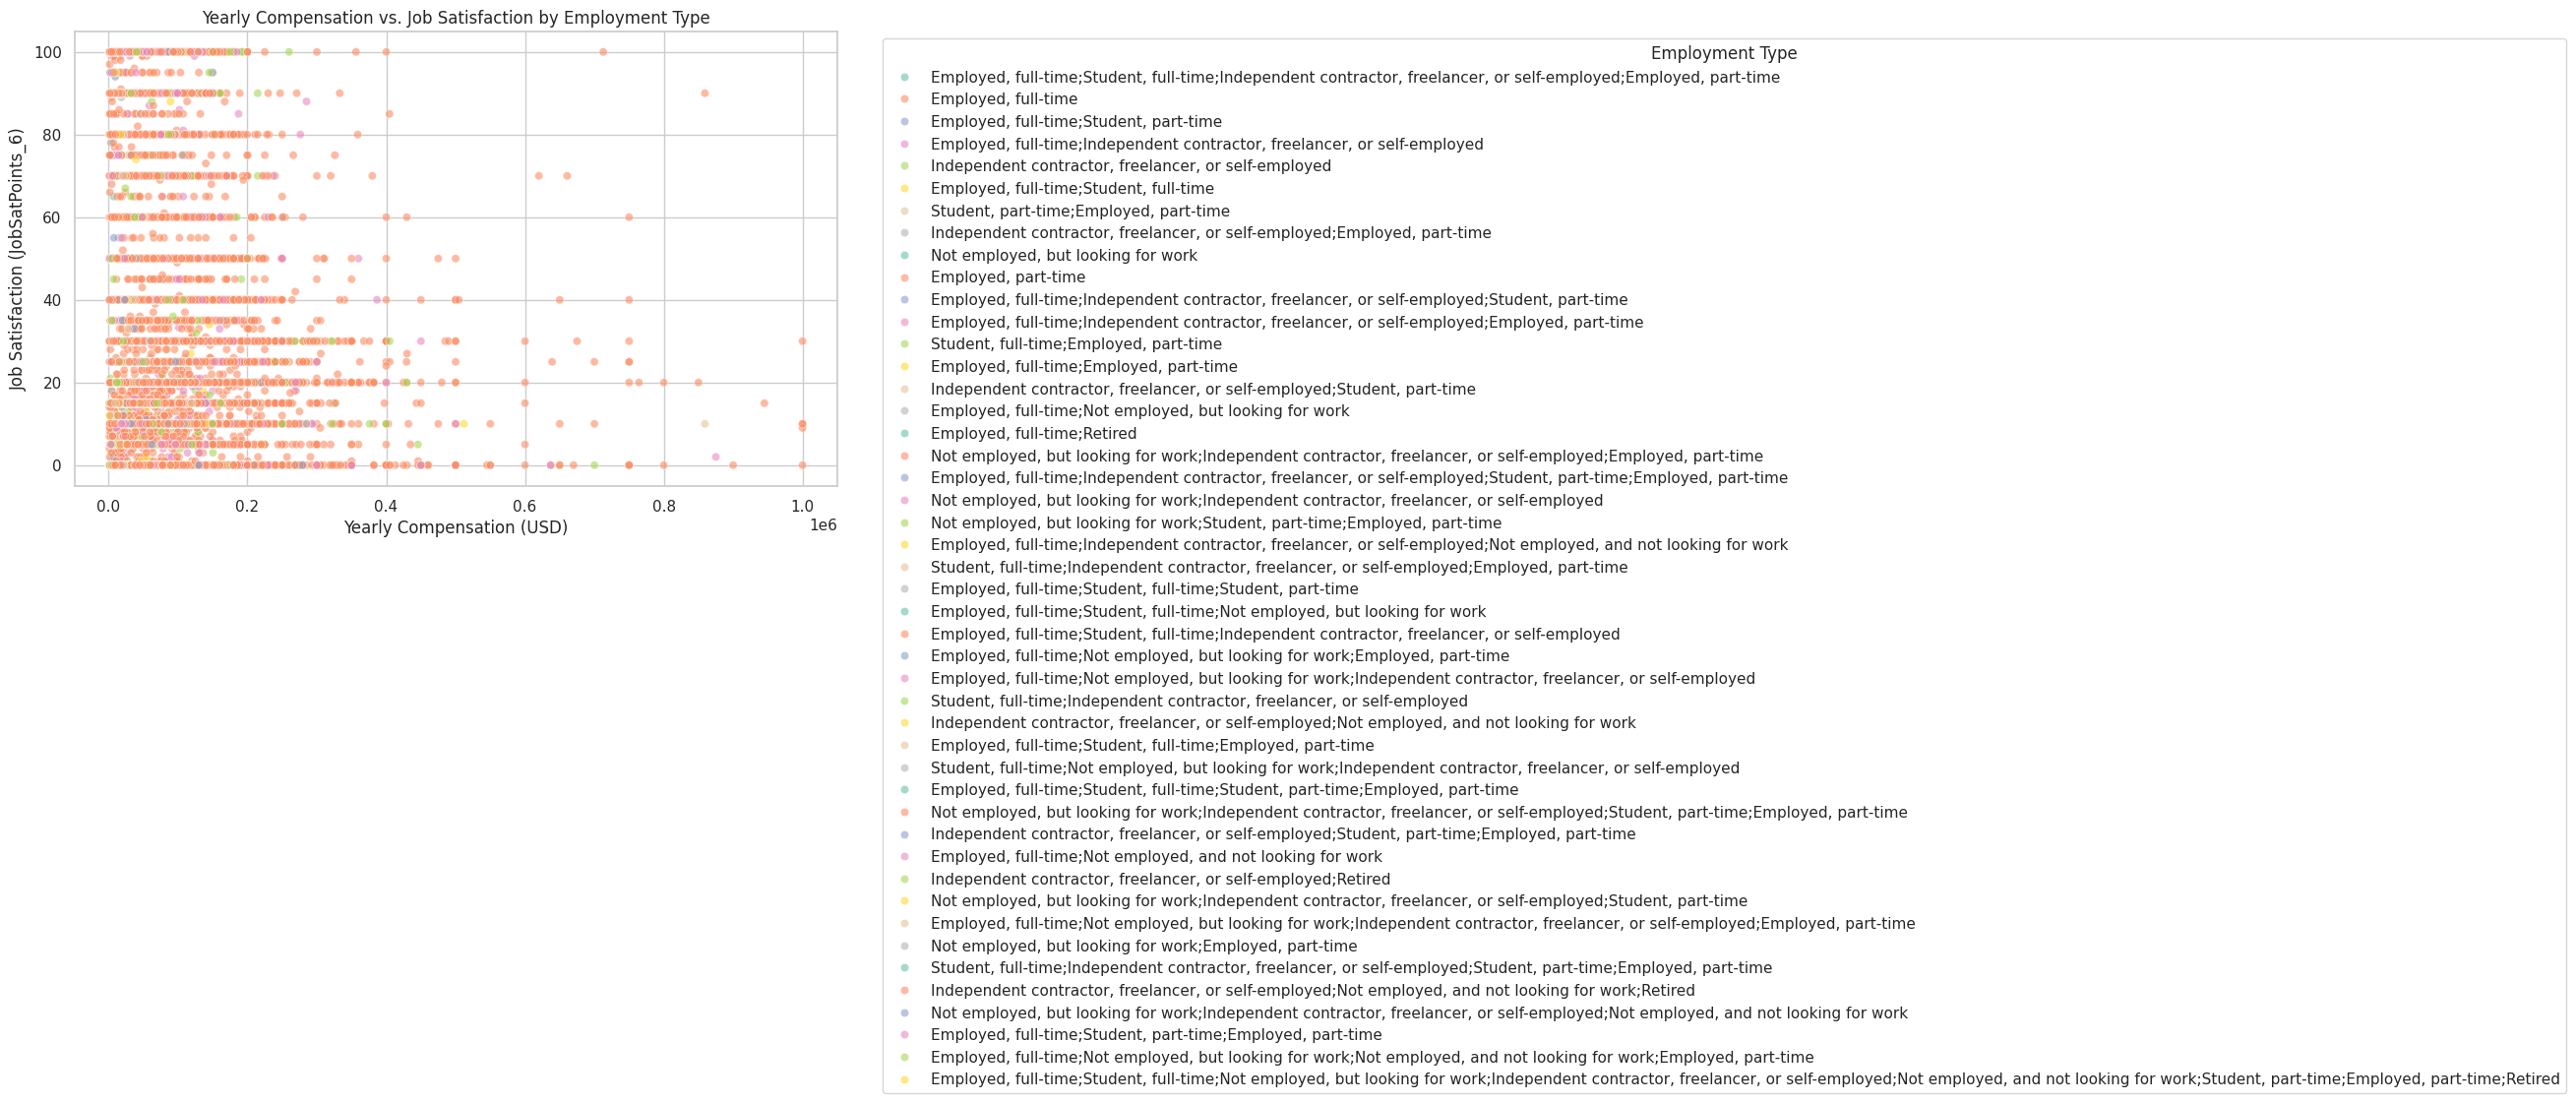

In [9]:
## Write your code here

# Ensure relevant columns are numeric and clean
df['ConvertedCompYearly'] = pd.to_numeric(df['ConvertedCompYearly'], errors='coerce')
df['JobSatPoints_6'] = pd.to_numeric(df['JobSatPoints_6'], errors='coerce')

# Drop rows with missing data
df_filtered = df.dropna(subset=['ConvertedCompYearly', 'JobSatPoints_6', 'Employment'])

# Filter out unrealistic compensation (e.g., above $1M)
df_filtered = df_filtered[
    (df_filtered['ConvertedCompYearly'] >= 1000) & 
    (df_filtered['ConvertedCompYearly'] <= 1000000)
]

# Set plot size and style
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Scatter plot with Employment type as hue
sns.scatterplot(
    data=df_filtered,
    x='ConvertedCompYearly',
    y='JobSatPoints_6',
    hue='Employment',
    alpha=0.6,
    palette='Set2'
)

# Labels and titles
plt.title('Yearly Compensation vs. Job Satisfaction by Employment Type')
plt.xlabel('Yearly Compensation (USD)')
plt.ylabel('Job Satisfaction (JobSatPoints_6)')
plt.legend(title='Employment Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

#### 2. Scatter Plot for Work Experience vs. Age Group by Country


Compare work experience (`YearsCodePro`) across different age groups (`Age`) and countries (`Country`). Use colors to represent different countries and markers for age groups.


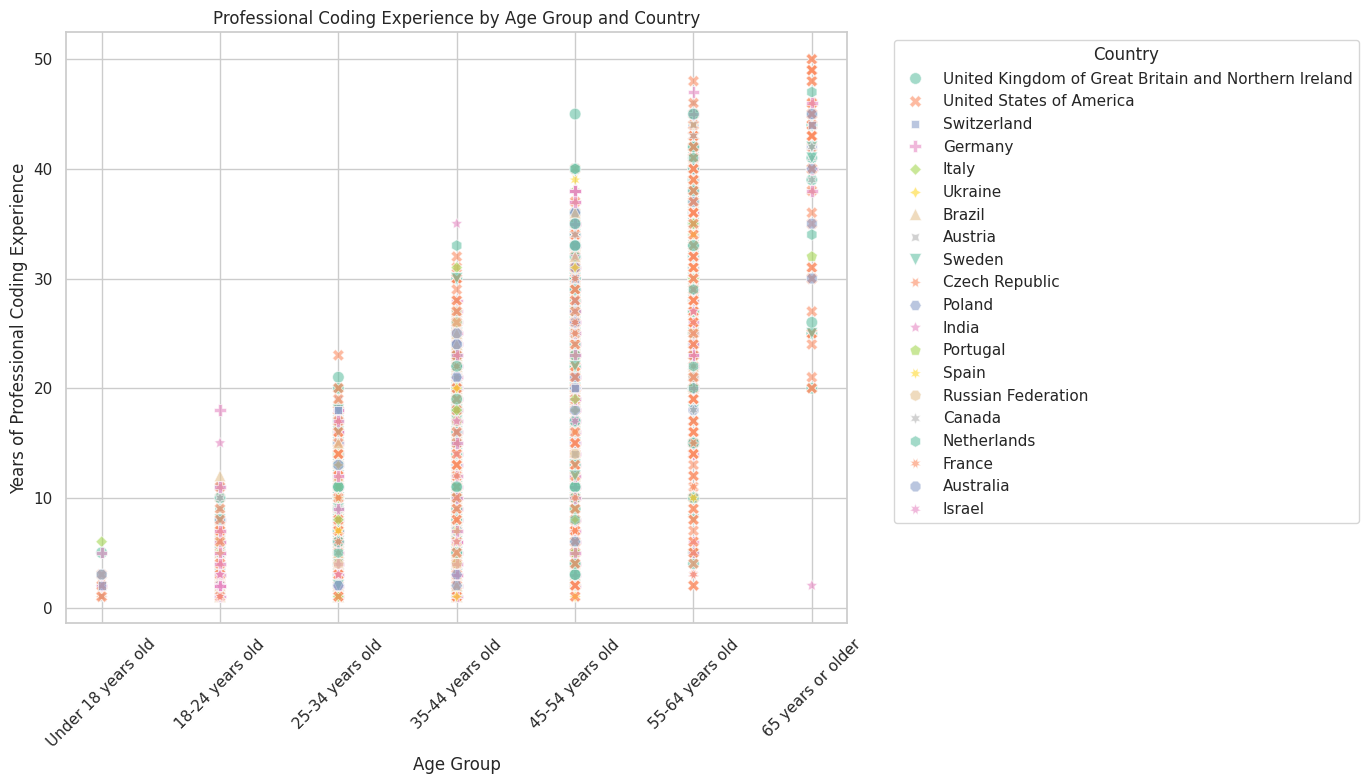

In [10]:
## Write your code here

# Ensure numeric conversion
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

# Drop missing or irrelevant values
df_filtered = df.dropna(subset=['Age', 'YearsCodePro', 'Country'])

# Filter to most common countries for clarity
top_countries = df_filtered['Country'].value_counts().nlargest(20).index
df_filtered = df_filtered[df_filtered['Country'].isin(top_countries)]

# Define ordered age categories
age_order = [
    "Under 18 years old", "18-24 years old", "25-34 years old", 
    "35-44 years old", "45-54 years old", "55-64 years old", 
    "65 years or older"
]
df_filtered = df_filtered[df_filtered['Age'].isin(age_order)]
df_filtered['AgeCategory'] = pd.Categorical(df_filtered['Age'], categories=age_order, ordered=True)

# Plot
plt.figure(figsize=(14, 8))
sns.scatterplot(
    data=df_filtered,
    x='AgeCategory',
    y='YearsCodePro',
    hue='Country',
    style='Country',
    alpha=0.6,
    s=70,
    palette='Set2'
)

# Add labels and title
plt.title('Professional Coding Experience by Age Group and Country')
plt.xlabel('Age Group')
plt.ylabel('Years of Professional Coding Experience')
plt.xticks(rotation=45)
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(True)
plt.show()

### Final Step: Review


With these scatter plots, you will have analyzed data relationships across multiple dimensions, including compensation, job satisfaction, employment types, and demographics, to uncover meaningful trends in the developer community.


### Summary


After completing this lab, you will be able to:
- Analyze how numerical variables relate across specific groups, such as employment types and countries.
- Use scatter plots effectively to represent multiple variables with color, size, and markers.
- Gain insights into compensation, satisfaction, and demographic trends using advanced scatter plot techniques.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-07|1.2|Madhusudan Moole|Reviewed and updated lab|                                                                                      
|2024-10-06|1.0|Raghul Ramesh|Created lab|-->


Copyright © IBM Corporation. All rights reserved.
